[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010] [0.3463454714273217, 0.20124299833614398, 0.17036584478587702, 0.22785267728381783, 0.24084651815820401, 0.18968132089901923, 0.11152815779695412, 0.18467567799318696]


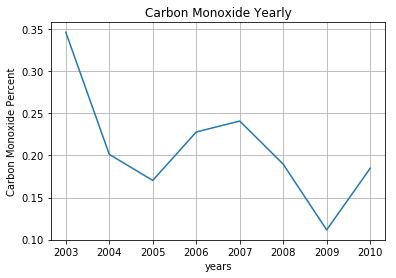

In [6]:
import urllib.request
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
def fraction_monoxide(image,date):
    """This function takes the input image, and checks each pixel individually to compare CO emissions"""
    im = Image.open(image)
    image_dimensions_in_pixels=im.size[0]*im.size[1]
    colors=im.getcolors(image_dimensions_in_pixels)
    red_pixels=0
    for pixel_count,color in colors:
        if color[1]<180 and color[2]<180 and color[0]>180: #checks if the pixel's RGB value has less than 180 green and blue, and is more than 180 red
            red_pixels+=pixel_count
    return red_pixels/image_dimensions_in_pixels
tmp=0
def monoxide_image(date,tmp):
    """Takes an initial date, with the format yyyy/ddd, and then utilizes the fraction_monoxide function for each image """
    name = date
    ful_name = "aerosol "+ str(name)+".jpg"
    #takes the date input, and downloads an image from NASA's gibs tool, getting data from the instrument that detects carbon monoxide
    url="https://gibs.earthdata.nasa.gov/image-download?TIME="+str(date)+"&extent=-151.5023958280347,2.061881667674527,-55.87739582803471,71.53063166767453&epsg=4326&layers=BlueMarble_ShadedRelief,Coastlines,MOPITT_CO_Monthly_Total_Column_Day&opacities=1,1,1&worldfile=false&format=image/jpeg&width=1098&height=701"
    urllib.request.urlretrieve(url, ful_name)
    f=fraction_monoxide(ful_name,date)
    #checks if the image found for the date had no information, by seeing if it had an impossible value. If this goes off, it does not count the image, and takes it out of the fraction
    if f<0.02:
        tmp+=1
        return 0
    return(f)

def compute(tmp):
    """Runs the monoxide_image function with a massive for loop that gets data for each month, averages it, and then creates an array of values compiled of each years data"""
    t = []
    s = []
    for i in range(8):
        x=2003+i
        #list of day inputs, missing only a few days at the end of the year
        dateval1=str(x)+"001"
        dateval2=str(x)+"031"
        dateval3=str(x)+"061"
        dateval4=str(x)+"091"
        dateval5=str(x)+"121"
        dateval6=str(x)+"151"
        dateval7=str(x)+"181"
        dateval8=str(x)+"211"
        dateval9=str(x)+"241"
        dateval10=str(x)+"271"
        dateval11=str(x)+"301"
        dateval12=str(x)+"331"
        value=12-tmp
        #adds all of the averages to a list, as well as the year to another list
        s.append((monoxide_image(dateval1,tmp)+monoxide_image(dateval2,tmp)+monoxide_image(dateval3,tmp)+monoxide_image(dateval4,tmp)+monoxide_image(dateval5,tmp)+monoxide_image(dateval6,tmp)+monoxide_image(dateval7,tmp)+monoxide_image(dateval8,tmp)+monoxide_image(dateval9,tmp)+monoxide_image(dateval10,tmp)+monoxide_image(dateval11,tmp)+monoxide_image(dateval12,tmp))/value)
        t.append(x)
    print(t,s)
    #plots the data
    plt.plot(t,s)
    plt.xlabel("years")
    plt.ylabel("Carbon Monoxide Percent")
    plt.title('Carbon Monoxide Yearly')
    plt.grid(True)

    plt.show()
    
compute(tmp)

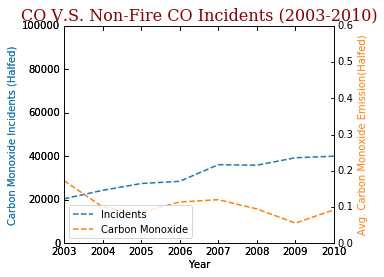

In [13]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
par1 = host.twinx()
host.set_xlim(2003, 2010)
host.set_ylim(0, 100000)
host.set_xlabel("Year")
#These two values are half of what is actually the value. They were shrunk by a factor of 2 to show the correlation more clearly by normalizing each equally
host.set_ylabel("Carbon Monoxide Incidents (Halfed)")
par1.set_ylabel("Avg. Carbon Monoxide Emission(Halfed)")
#each value with its corresponding year, every value being cut in half
p1, = host.plot([2003,2004,2005,2006,2007,2008,2009,2010], [40900/2,48700/2,55000/2,57000/2,72300/2,71800/2,78700/2,80100/2], label="Incidents",linestyle='dashed')
p2, = par1.plot([2003,2004,2005,2006,2007,2008,2009,2010], [0.3463454714273217/2, 0.20124299833614398/2, 0.17036584478587702/2, 0.22785267728381783/2, 0.24084651815820401/2, 0.18968132089901923/2, 0.11152815779695412/2, 0.18467567799318696/2], label="Carbon Monoxide",linestyle='dashed')
par1.set_ylim(0, .6)
host.legend(loc=3)
host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
plt.title("CO V.S. Non-Fire CO Incidents (2003-2010)",fontdict=font)
plt.figure(figsize=(20,10))
plt.draw()
plt.show()